# USDA Macronutrient Analysis Using Clustering and Regression: Food for Thought
- by Jason R. Turner

In [1]:
# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import wrangle
import pandas as pd
import numpy as np
import os

# Pre-processing Data
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

# Model
from sklearn.cluster import KMeans
import model

# Custom module
import util

## Wrangle
- Allows user to access "Food and Nutrient Database for Dietary Studies" from USDA.gov website and write it to an excel file then return a dataframe.
- Returns a dataframe that takes the first row from the original dataframe and makes them the names of their respective columns
- Drops columns with unwanted variables for the purposes of this project
- Converts Energy, Protein, Carbohydrate, Total Sugars, Fiber, Total Fat, and Water, from objects to floats

In [2]:
# Combines get_food_data, first_row_to_col_head, drop_cols, and object_to_int functions to acquire and return a prepared dataframe.
df = wrangle.wrangle_food()

**Checks for the following:**
- Null values 
- Data types
- Standard metric values

In [3]:
# Gets the number of rows, columns, and number of rows with nulls for each column.  Also returns description for common values from table.
util.metrics(df)

There are 7083 rows and 10 columns in this dataframe.
Plus the following nulls:
0
Food code                     0
Main food description         0
WWEIA Category description    0
Energy (kcal)                 0
Protein (g)                   0
Carbohydrate (g)              0
Sugars, total\n(g)            0
Fiber, total dietary (g)      0
Total Fat (g)                 0
Water\n(g)                    0
dtype: int64
0
Food code                      object
Main food description          object
WWEIA Category description     object
Energy (kcal)                 float64
Protein (g)                   float64
Carbohydrate (g)              float64
Sugars, total\n(g)            float64
Fiber, total dietary (g)      float64
Total Fat (g)                 float64
Water\n(g)                    float64
dtype: object


,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
Energy (kcal),7083.0,197.121559,140.705036,0.0,85.000,166.00,274.000,902.00
Protein (g),7083.0,8.599085,8.296889,0.0,2.220,6.19,12.130,78.13
Carbohydrate (g),7083.0,20.828039,21.887363,0.0,5.650,13.30,26.195,100.00
"Sugars, total\n(g)",7083.0,7.336660,12.795577,0.0,0.780,2.39,7.380,99.80
"Fiber, total dietary (g)",7083.0,1.703840,2.558168,0.0,0.100,1.00,2.100,46.20
Total Fat (g),7083.0,8.958187,11.049585,0.0,2.060,5.48,12.650,100.00
Water\n(g),7083.0,59.798820,26.828203,0.0,45.895,66.59,80.605,99.98


**Checks for the total number of unique values in each column from largest to smallest and the total number of non-null values for all columns**

In [4]:
# Returns the number of instances of unique values in descending order and the number of non-nulls for every column
util.get_numbers(df)

Food code
11000000    1
58146333    1
58146372    1
58146371    1
58146363    1
           ..
27540147    1
27540146    1
27540145    1
27540139    1
99998210    1
Name: Food code, Length: 7083, dtype: int64
-----------------
Main food description
Milk, human                                                                  1
Pasta with tomato-based sauce, meat, and added vegetables, ready-to-heat     1
Pasta with tomato-based sauce, seafood, and added vegetables, home recipe    1
Pasta with tomato-based sauce, seafood, and added vegetables, restaurant     1
Pasta with tomato-based sauce and seafood, ready-to-heat                     1
                                                                            ..
Chicken fillet sandwich, fried, from fast food, with cheese                  1
Chicken fillet sandwich, fried, from fast food                               1
Chicken fillet biscuit, from fast food                                       1
Chicken fillet sandwich, from school cafe

## Summary
- There are no null values that need to be handled
- Converted objects to floats for appropriate columns
- Food code and Main food descriptions are all unique values
- WWEIA Category descriptions go from hundreds down to one for each unique value

# Exploratory Analysis

#### What's the distribution for each of our variables?
- We show histogram plots for each column with integer values using default histogram settings  and when binned into 100 bins

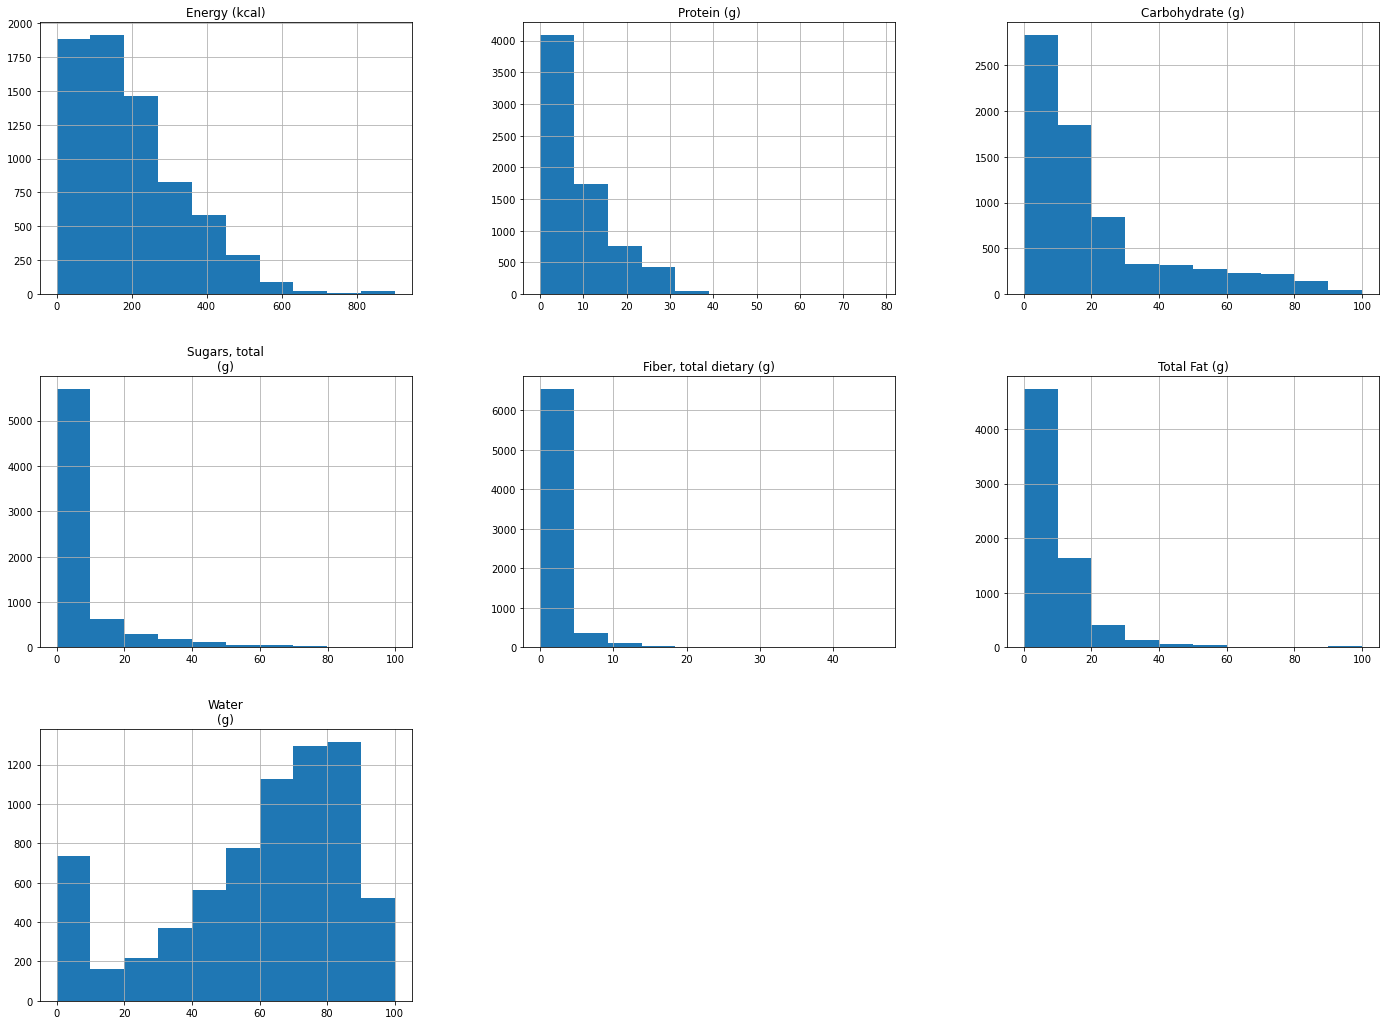

In [5]:
# Shows histograms for numerical columns in df
df.hist(figsize=(24, 18))
plt.show()

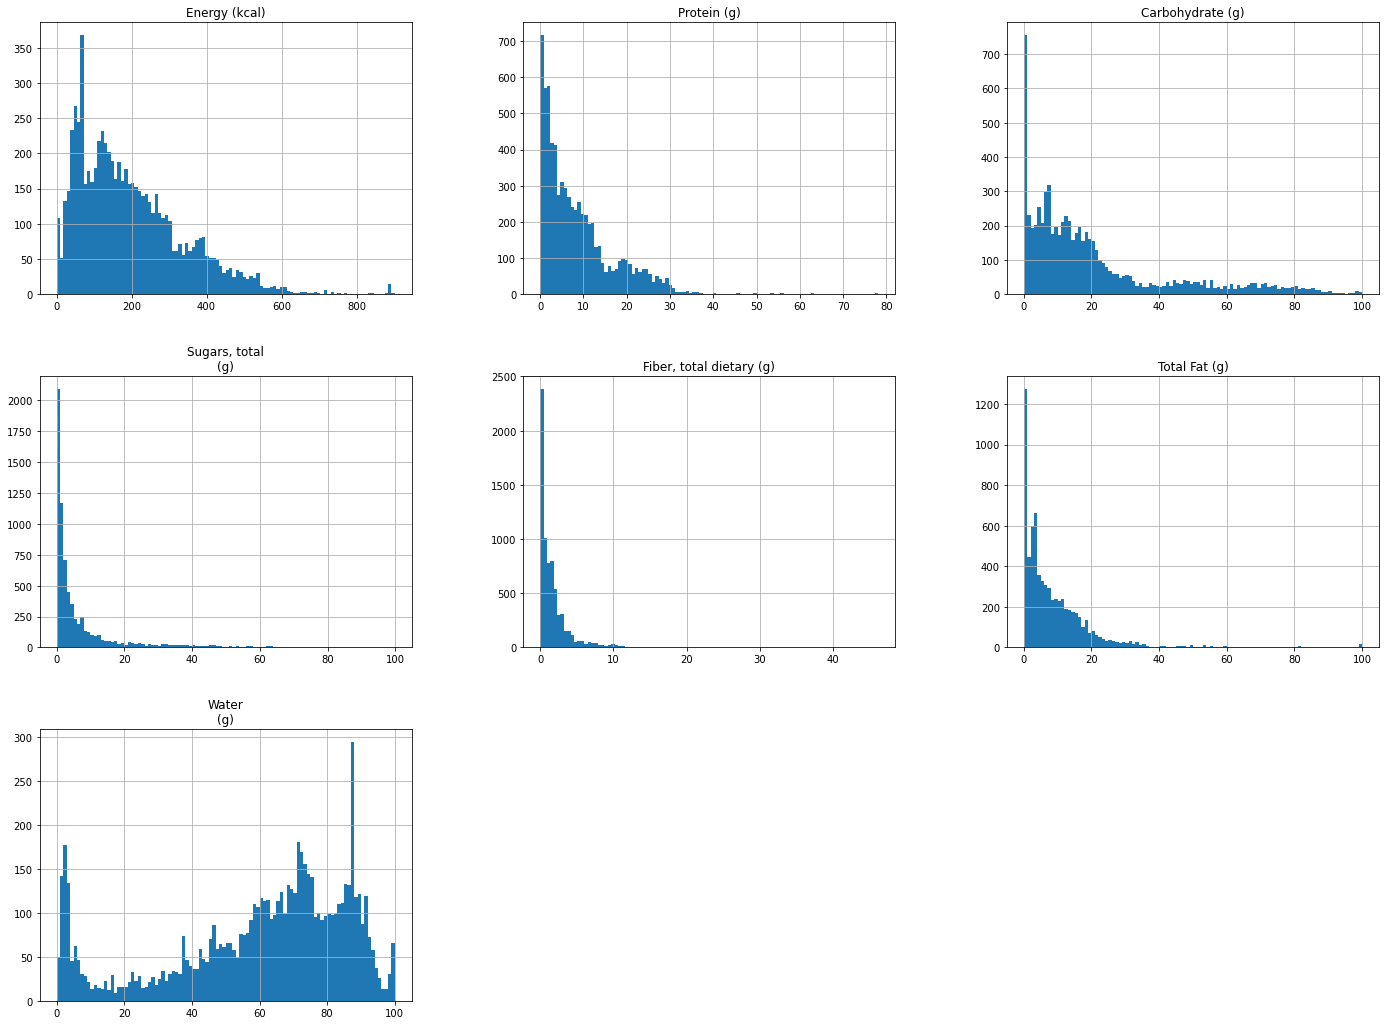

In [6]:
# Shows histograms for numerical columns in df divided into 100 bins
df.hist(figsize=(24, 18), bins=100)
plt.show()

**Checking for values that are too extreme**

In [7]:
# Sets variable for desired numerical columns and a categorical column for groupby function
food_types_and_nutrients = ['WWEIA Category description',
                            'Energy (kcal)', 
                            'Protein (g)', 
                            'Carbohydrate (g)', 
                            'Sugars, total\n(g)', 
                            'Fiber, total dietary (g)', 
                            'Total Fat (g)', 
                            'Water\n(g)']
# Looks at the central tendencies for nutrient columns plus other aggregate functions 
food_types = df[food_types_and_nutrients].groupby("WWEIA Category description").agg(["min", "mean", "median", "std", "max"])
food_types.round(2)

0                               Energy (kcal)                                \
                                          min    mean median     std    max   
WWEIA Category description                                                    
Apple juice                              46.0   46.67   46.0    1.15   48.0   
Apples                                   42.0   82.29   68.0   33.71  134.0   
Baby food: cereals                       64.0  284.70  390.5  156.56  407.0   
Baby food: fruit                         37.0   58.96   60.0   16.16  109.0   
Baby food: meat and dinners              48.0   81.11   69.0   35.57  188.0   
...                                       ...     ...    ...     ...    ...   
White potatoes, baked or boiled          60.0  120.35  125.0   20.24  159.0   
Wine                                     49.0   91.08   84.0   34.28  160.0   
Yeast breads                             87.0  279.97  275.0   43.13  448.0   
Yogurt, Greek                            61.0   93.93   95.0   24.54  160.0   
Yogurt, regular                          56.0   72.12   72.0   10.89   89.0   

0                               Protein (g)                            ...  \
                                        min  mean median   std    max  ...   
WWEIA Category description                                             ...   
Apple juice                            0.10  0.11   0.10  0.01   0.12  ...   
Apples                                 0.10  0.36   0.17  0.44   1.34  ...   
Baby food: cereals                     0.71  5.88   6.66  3.97  13.20  ...   
Baby food: fruit                       0.00  0.38   0.30  0.31   1.10  ...   
Baby food: meat and dinners            1.11  5.56   3.40  4.67  14.60  ...   
...                                     ...   ...    ...   ...    ...  ...   
White potatoes, baked or boiled        1.34  2.39   1.95  0.84   4.69  ...   
Wine                                   0.00  0.16   0.07  0.16   0.50  ...   
Yeast breads                           3.48  9.63   9.43  2.19  16.94  ...   
Yogurt, Greek                          7.33  8.87   8.64  0.87  10.30  ...   
Yogurt, regular                        0.31  4.36   5.09  1.36   5.73  ...   

0                               Total Fat (g)                            \
                                          min  mean median   std    max   
WWEIA Category description                                                
Apple juice                              0.13  0.14   0.13  0.02   0.17   
Apples                                   0.10  0.84   0.17  1.22   3.04   
Baby food: cereals                       0.40  3.33   2.70  2.62   7.05   
Baby food: fruit                         0.00  0.14   0.15  0.11   0.37   
Baby food: meat and dinners              0.50  3.51   2.18  3.52  14.60   
...                                       ...   ...    ...   ...    ...   
White potatoes, baked or boiled          0.10  3.95   4.24  2.22   8.35   
Wine                                     0.00  0.02   0.00  0.03   0.08   
Yeast breads                             0.00  5.00   3.59  4.73  24.75   
Yogurt, Greek                            0.15  2.38   2.50  1.51   5.00   
Yogurt, regular                          0.17  1.61   1.51  1.03   3.50   

0                               Water\n(g)                              
                                       min   mean median    std    max  
WWEIA Category description                                              
Apple juice                          87.92  88.13  88.24   0.18  88.24  
Apples                               66.30  78.72  81.98   7.82  88.22  
Baby food: cereals                    1.00  31.33   5.26  37.93  84.77  
Baby food: fruit                     72.23  84.03  83.72   4.10  89.50  
Baby food: meat and dinners          68.30  83.58  85.05   4.98  89.10  
...                                    ...    ...    ...    ...    ...  
White potatoes, baked or boiled      68.04  72.69  72.09   2.97  83.97  
Wine               

## Summary
- Plotting each  column as a histogram shows that with the exception of water they are right-skewed
- None of the values found appear extreme enough to be excluded and may be important for differentiation 

## Statistical Test

### Splitting Data into train, validate, and test datasets and showing each ones size

In [8]:
# Splits test off, 20% of original df size. 
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=42)

# Splits validate off, 30% of what remains (24% of original df size)
# Thus train will be 56% of original df size. 
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=42)

print("train observations: ", train.size)
print("validate observations: ", validate.size)
print("test observations: ", test.size)

train observations:  39660
validate observations:  17000
test observations:  14170


Setting alpha to .05

In [9]:
α = .05

#### How strong are the relationships between each of the numerical variables?

$H_0$ = Null Hypothesis - There's a significant relationship between all the nutrition categories.

$H_A$ = Alternative Hypothesis - There's not a significant relationship between all the nutrition categories.

Relationship strength between each pair of numerical variables


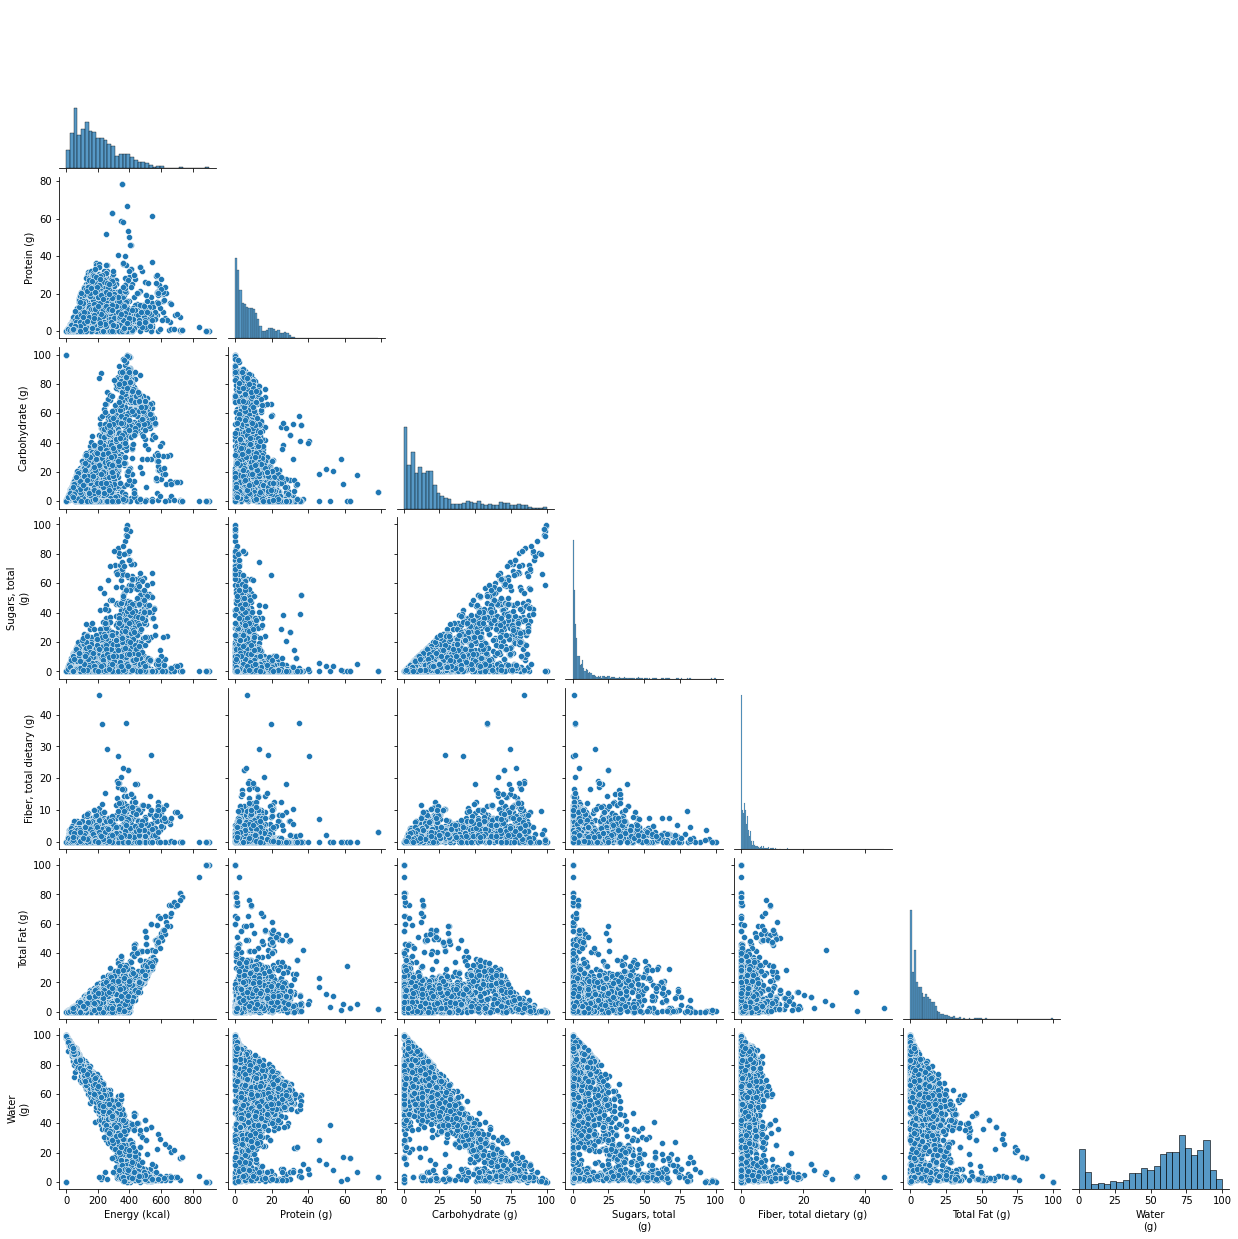

In [10]:
print("Relationship strength between each pair of numerical variables")
numerical_cols = ['Energy (kcal)', 
                  'Protein (g)', 
                  'Carbohydrate (g)', 
                  'Sugars, total\n(g)', 
                  'Fiber, total dietary (g)', 
                  'Total Fat (g)', 
                  'Water\n(g)']
sns.pairplot(train[numerical_cols], corner=True)
plt.show()

In [11]:
train.corr(method ='pearson')

,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g)
0,,,,,,,
Energy (kcal),1.000000,0.291216,0.609134,0.393966,0.334046,0.795103,-0.938103
Protein (g),0.291216,1.000000,-0.161689,-0.225185,-0.011715,0.210690,-0.280306
Carbohydrate (g),0.609134,-0.161689,1.000000,0.685414,0.489036,0.081682,-0.809627
"Sugars, total\n(g)",0.393966,-0.225185,0.685414,1.000000,0.131326,0.050997,-0.512421
"Fiber, total dietary (g)",0.334046,-0.011715,0.489036,0.131326,1.000000,0.112865,-0.451687
Total Fat (g),0.795103,0.210690,0.081682,0.050997,0.112865,1.000000,-0.554528
Water\n(g),-0.938103,-0.280306,-0.809627,-0.512421,-0.451687,-0.554528,1.000000


In [12]:
train_corr = pd.DataFrame() # Correlation matrix
train_p = pd.DataFrame()  # Matrix of p-values
for x in train[numerical_cols].columns:
    for y in train[numerical_cols].columns:
        corr = stats.pearsonr(train[x], train[y])
        train_corr.loc[x,y] = corr[0]
        train_p.loc[x,y] = corr[1]

In [13]:
train_corr

,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g)
Energy (kcal),1.000000,0.291216,0.609134,0.393966,0.334046,0.795103,-0.938103
Protein (g),0.291216,1.000000,-0.161689,-0.225185,-0.011715,0.210690,-0.280306
Carbohydrate (g),0.609134,-0.161689,1.000000,0.685414,0.489036,0.081682,-0.809627
"Sugars, total\n(g)",0.393966,-0.225185,0.685414,1.000000,0.131326,0.050997,-0.512421
"Fiber, total dietary (g)",0.334046,-0.011715,0.489036,0.131326,1.000000,0.112865,-0.451687
Total Fat (g),0.795103,0.210690,0.081682,0.050997,0.112865,1.000000,-0.554528
Water\n(g),-0.938103,-0.280306,-0.809627,-0.512421,-0.451687,-0.554528,1.000000


Table showing variables with at least weak correlations in train

In [14]:
# returns boolean for absolute value greater than .25
abs(train_corr) > .25

,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g)
Energy (kcal),True,True,True,True,True,True,True
Protein (g),True,True,False,False,False,False,True
Carbohydrate (g),True,False,True,True,True,False,True
"Sugars, total\n(g)",True,False,True,True,False,False,True
"Fiber, total dietary (g)",True,False,True,False,True,False,True
Total Fat (g),True,False,False,False,False,True,True
Water\n(g),True,True,True,True,True,True,True


Table showing variables with strong correlations in train

In [15]:
# returns boolean for absolute value greater than .75
abs(train_corr) > .75

,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g)
Energy (kcal),True,False,False,False,False,True,True
Protein (g),False,True,False,False,False,False,False
Carbohydrate (g),False,False,True,False,False,False,True
"Sugars, total\n(g)",False,False,False,True,False,False,False
"Fiber, total dietary (g)",False,False,False,False,True,False,False
Total Fat (g),True,False,False,False,False,True,False
Water\n(g),True,False,True,False,False,False,True


Table showing the p-values for variables in train

In [16]:
train_p

,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g)
Energy (kcal),0.000000e+00,2.267938e-78,0.000000e+00,2.105170e-147,5.408564e-104,0.000000e+00,0.000000e+00
Protein (g),2.267938e-78,0.000000e+00,1.222562e-24,9.008315e-47,4.607750e-01,4.931204e-41,1.648397e-72
Carbohydrate (g),0.000000e+00,1.222562e-24,0.000000e+00,0.000000e+00,1.381373e-237,2.591273e-07,0.000000e+00
"Sugars, total\n(g)",2.105170e-147,9.008315e-47,0.000000e+00,0.000000e+00,1.008247e-16,1.314964e-03,1.621350e-264
"Fiber, total dietary (g)",5.408564e-104,4.607750e-01,1.381373e-237,1.008247e-16,0.000000e+00,1.015620e-12,1.083497e-198
Total Fat (g),0.000000e+00,4.931204e-41,2.591273e-07,1.314964e-03,1.015620e-12,0.000000e+00,1.174028e-318
Water\n(g),0.000000e+00,1.648397e-72,0.000000e+00,1.621350e-264,1.083497e-198,1.174028e-318,0.000000e+00


Table showing p-values greater than alpha

In [17]:
# Shows boolean answers for train_p less than .05
train_p < α

,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g)
Energy (kcal),True,True,True,True,True,True,True
Protein (g),True,True,True,True,False,True,True
Carbohydrate (g),True,True,True,True,True,True,True
"Sugars, total\n(g)",True,True,True,True,True,True,True
"Fiber, total dietary (g)",True,False,True,True,True,True,True
Total Fat (g),True,True,True,True,True,True,True
Water\n(g),True,True,True,True,True,True,True


Table showing where there are statistically signifcant correlations that are at least weakly correllated.

In [18]:
# Returns boolean answers where both train_corr is greater than .25 and train_p
# is less than alpha
(abs(train_corr) > .25) & (train_p < α)

,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g)
Energy (kcal),True,True,True,True,True,True,True
Protein (g),True,True,False,False,False,False,True
Carbohydrate (g),True,False,True,True,True,False,True
"Sugars, total\n(g)",True,False,True,True,False,False,True
"Fiber, total dietary (g)",True,False,True,False,True,False,True
Total Fat (g),True,False,False,False,False,True,True
Water\n(g),True,True,True,True,True,True,True


### Summary
Most values have at least a weak statisticaly significant correlation except for the following combinations which reject the Null Hypothesis:
- Protein & Carbohydrate
- Protein & Sugars
- Protein & Fiber
- Protein & Total Fat
- Carbohydrate & Total Fat
- Sugars & Fiber
- Sugars & Total Fat
- Fiber & Total Fat

## Clustering Models

#### Pre-Processing our Datasets

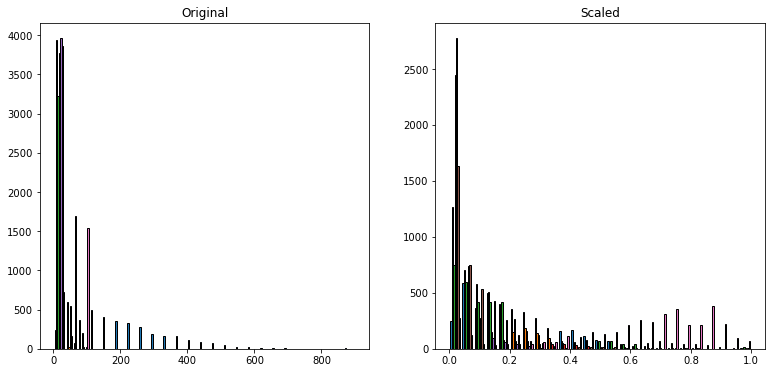

In [19]:
# Accepts train, validate, and test as inputs from split data then returns scaled versions 
# for each one using MinMaxScaler and a chart comparing the original to the scaled version.
scaled_train, scaled_validate, scaled_test = wrangle.scale_food(train, validate, test)

In [20]:
cols_to_scale = numerical_cols

# Isolating numerical columns from train, validate, and test datasets
scaled_train = scaled_train[cols_to_scale]

scaled_validate = scaled_validate[cols_to_scale]

scaled_test = scaled_test[cols_to_scale]

scaled_set = [scaled_train, scaled_validate, scaled_test]

### K-Means Clustering on numerical columns

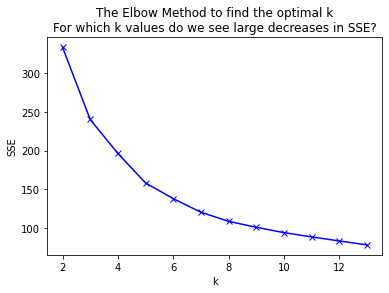

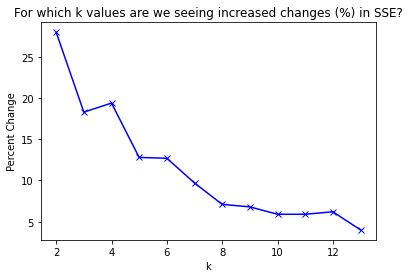

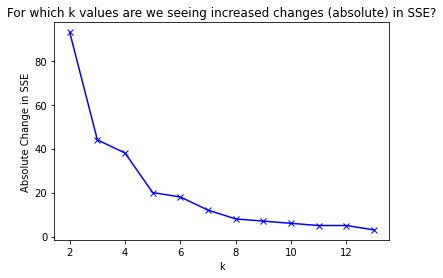

,k,sse,delta,pct_delta
0,2,333.324385,93.0,28.0
1,3,240.050207,44.0,18.3
2,4,196.228526,38.0,19.4
3,5,158.134199,20.0,12.8
4,6,137.904536,18.0,12.7
5,7,120.343027,12.0,9.7
6,8,108.612701,8.0,7.1
7,9,100.919605,7.0,6.8
8,10,94.030763,6.0,5.9
9,11,88.478861,5.0,5.9


In [21]:
k_range = range(2,15)
cluster_name = 'nutrient_cluster'
cluster_vars = numerical_cols
model.find_k(scaled_train, cluster_vars, k_range)

Using the elbow method it appears that the point where K appears to drop off is around 7, which is what I'll use for k going forward

In [22]:
# sets variable k to 7
k = 7

In [23]:
kmeans = model.cluster_maker(scaled_train, k, cluster_vars)

In [24]:
# Makes predictions with scaled training data and adds column for clusters as 'cluster' to original train df
train['cluster'] = kmeans.predict(scaled_train[cluster_vars])
train

,Food code,Main food description,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g),cluster
637,14650180,Alfredo sauce with poultry,"Dips, gravies, other sauces",153.0,7.10,1.20,0.72,0.0,13.59,76.53,3
1462,26137140,"Salmon, coated, fried, made with oil",Fish,253.0,20.50,9.85,0.88,0.6,14.08,54.87,5
5474,71405019,"Potato, hash brown, from fresh, with cheese",French fries and other fried white potatoes,221.0,5.10,16.18,1.12,1.4,15.49,61.10,3
765,22201400,"Pork steak or cutlet, breaded or floured, frie...",Pork,306.0,21.07,16.60,1.46,1.0,16.72,43.09,5
1607,26305180,"Crab, canned",Shellfish,83.0,17.88,0.00,0.00,0.0,0.74,79.69,0
...,...,...,...,...,...,...,...,...,...,...,...
5653,72128223,"Turnip greens, canned, cooked, fat added",Other dark green vegetables,41.0,1.32,2.71,0.40,1.3,2.81,91.55,0
2774,32130680,"Egg omelet or scrambled egg, with cheese, toma...",Eggs and omelets,185.0,11.58,1.63,0.79,0.2,14.47,70.58,5
7012,95201500,"Nutritional powder mix, high protein (Herbalife)",Protein and nutritional powders,392.0,53.57,20.38,3.57,0.0,10.71,8.30,2
1147,25112200,"Liver paste or pate, chicken",Liver and organ meats,201.0,13.45,6.55,0.00,0.0,13.10,65.64,5


In [25]:
def assign_clusters(kmeans, cluster_vars, cluster_name, centroid_df):
    '''
    Labels clusters for each observation in scaled_train, scaled_validate, & scaled_test
    '''
    for i in range(len(scaled_set)):
        clusters = pd.DataFrame(kmeans.predict(scaled_set[i][cluster_vars]), 
                            columns=[cluster_name], index=scaled_set[i].index)

        clusters_centroids = clusters.merge(centroid_df, on=cluster_name, copy=False).set_index(clusters.index.values)

        scaled_set[i] = pd.concat([scaled_set[i], clusters_centroids], axis=1)
    return scaled_set

In [26]:
# fit kmeans 
kmeans = model.cluster_maker(scaled_train, k, cluster_vars)

# get centroid values per variable per cluster
centroid_df = model.get_centroids(kmeans, cluster_vars, cluster_name)

# get cluster assignments and append those with centroids for each X partition (train, validate, test)
scaled_set = assign_clusters(kmeans, cluster_vars, cluster_name, centroid_df)

In [27]:
# Returns the centroids for each cluster for each column and total number for 
# each cluster of our scaled training set
scaled_centroids = pd.DataFrame(scaled_set[0].groupby(['nutrient_cluster', 
                                    'centroid_Energy (kcal)', 
                                    'centroid_Protein (g)',
                                    'centroid_Carbohydrate (g)',
                                    'centroid_Sugars, total\n(g)',
                                    'centroid_Fiber, total dietary (g)',
                                    'centroid_Total Fat (g)',
                                    'centroid_Water\n(g)'])['nutrient_cluster'].count())
scaled_centroids

,,,,,,,,nutrient_cluster
nutrient_cluster,centroid_Energy (kcal),centroid_Protein (g),centroid_Carbohydrate (g),"centroid_Sugars, total (g)","centroid_Fiber, total dietary (g)",centroid_Total Fat (g),centroid_Water (g),
0,0.062159,0.032213,0.076980,0.045426,0.020938,0.016967,0.869939,1096
1,0.462145,0.110850,0.675282,0.161263,0.129277,0.141422,0.070540,310
2,0.316436,0.124163,0.348834,0.086671,0.050802,0.120570,0.410650,575
3,0.163915,0.079289,0.161052,0.033082,0.034249,0.063664,0.694717,1013
4,0.448442,0.058743,0.723849,0.535620,0.050031,0.117169,0.095500,184
5,0.239578,0.274049,0.049847,0.009171,0.006950,0.118385,0.596997,691
6,0.678207,0.160128,0.123905,0.035362,0.084996,0.590561,0.134265,97


### Pairplots of each numerical column with clusters as the different hues

In [28]:
# sets variable numerical_cols_and_clusters to list of desired columns
numerical_cols_and_clusters = ['Energy (kcal)',
                               'Protein (g)',
                               'Carbohydrate (g)',
                               'Sugars, total\n(g)',
                               'Fiber, total dietary (g)',
                               'Total Fat (g)',
                               'Water\n(g)', 'cluster']

<Figure size 1728x720 with 0 Axes>

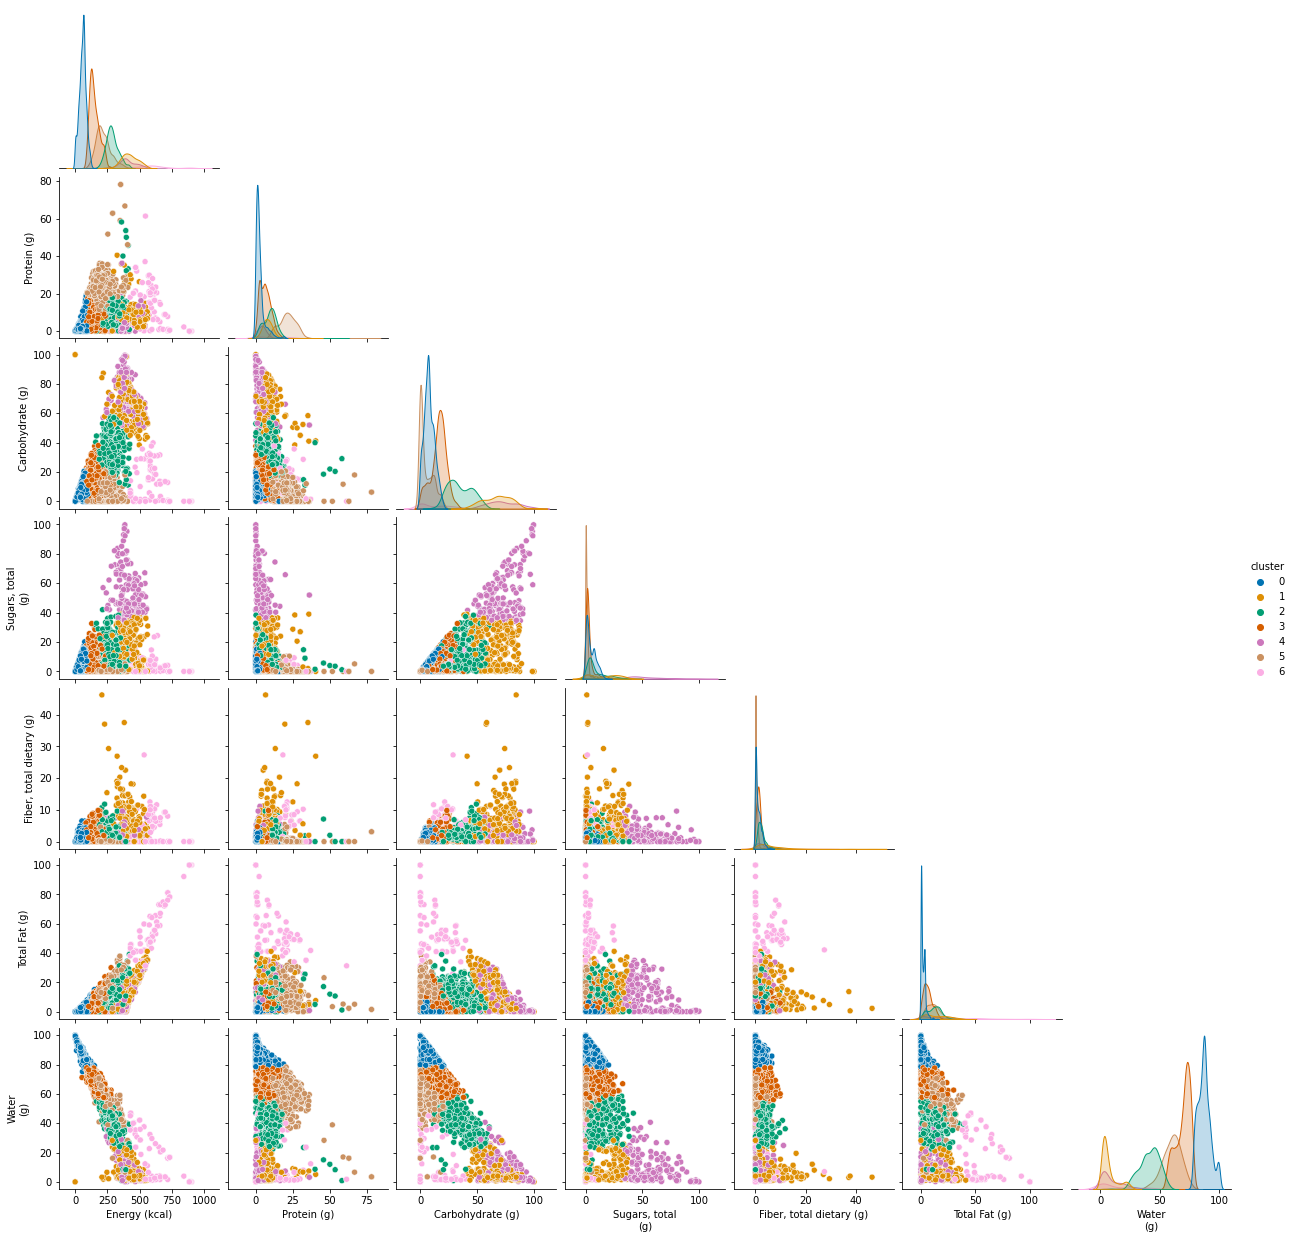

In [29]:
# Shows scatter plots of each unique pair of numerical columns from train 
# dataset colored by cluster as the hue
plt.figure(figsize=(24, 10))
sns.pairplot(train[numerical_cols_and_clusters], hue='cluster', palette='colorblind', corner=True)
plt.show()

## Statistical Tests Using K-Means Clusters

#### What's the relationship between the clusters and the food nutrients?

$H_0$ = Null Hypothesis - There's a significant strong relationship between the clusters of  different food nutrient categories.

$H_A$ = Alternative Hypothesis - There's not a significant strong relationship between the clusters of different food nutrient categories.


*Setting alpha to .05 for .95 confidence interval*

In [30]:
# sets alpha to .05 
α = .05

#### Verifying Assumptions
- Clusters are independent samples
- Cluster distributions appear to be roughly normal on average
- Cluster variances are can very by large amounts
    - 2-sample independent t-tests will need to be used 

### Cluster comparisons vs nutritional column category repeated for each column

In [31]:
# Assigns each cluster as a dataset for respective column
cluster_0 = train[train.cluster == 0]['Energy (kcal)']
cluster_1 = train[train.cluster == 1]['Energy (kcal)']
cluster_2 = train[train.cluster == 2]['Energy (kcal)']
cluster_3 = train[train.cluster == 3]['Energy (kcal)']
cluster_4 = train[train.cluster == 4]['Energy (kcal)']
cluster_5 = train[train.cluster == 5]['Energy (kcal)']
cluster_6 = train[train.cluster == 6]['Energy (kcal)']

In [32]:
# Assigns each cluster as the datasets not in respective column
non_cluster_0 = train[train.cluster != 0]['Energy (kcal)']
non_cluster_1 = train[train.cluster != 1]['Energy (kcal)']
non_cluster_2 = train[train.cluster != 2]['Energy (kcal)']
non_cluster_3 = train[train.cluster != 3]['Energy (kcal)']
non_cluster_4 = train[train.cluster != 4]['Energy (kcal)']
non_cluster_5 = train[train.cluster != 5]['Energy (kcal)']
non_cluster_6 = train[train.cluster != 6]['Energy (kcal)']

### Independent 2-sample t-tests

In [33]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_0, non_cluster_0, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(-78.3600860283382, 0.0)

In [34]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_1, non_cluster_1, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(51.11849098239333, 1.562498544570816e-199)

In [35]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_2, non_cluster_2, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(31.72134168909403, 7.598278742236365e-188)

In [36]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_3, non_cluster_3, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(-21.679476447002347, 2.9540027910041454e-98)

In [37]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_4, non_cluster_4, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(39.56810261880806, 3.285875206487769e-112)

In [38]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_5, non_cluster_5, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(6.137912749525693, 9.501047392127762e-10)

In [39]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_6, non_cluster_6, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(31.852266775144017, 2.535757432845538e-54)

In [40]:
# Applies Kruskal-Wallis test for cross-verification
stats.kruskal(cluster_0, cluster_1, cluster_2, cluster_3, cluster_4, cluster_5, cluster_6)

KruskalResult(statistic=3503.1325848540337, pvalue=0.0)

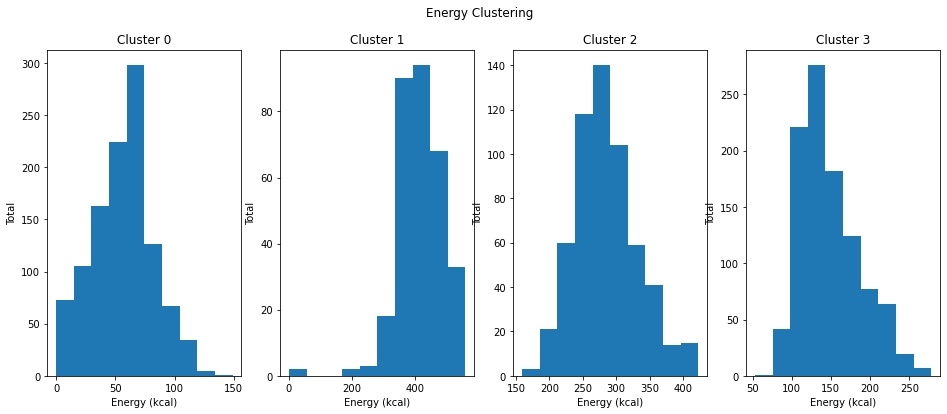

In [41]:
# Creates chart with subplots for histograms
plt.figure(figsize=(16, 6))
plt.suptitle('Energy Clustering')

plt.subplot(141)
plt.hist(cluster_0)
plt.title('Cluster 0')
plt.xlabel('Energy (kcal)')
plt.ylabel('Total')

plt.subplot(142)
plt.hist(cluster_1)
plt.title('Cluster 1')
plt.xlabel('Energy (kcal)')
plt.ylabel('Total')

plt.subplot(143)
plt.hist(cluster_2)
plt.title('Cluster 2')
plt.xlabel('Energy (kcal)')
plt.ylabel('Total')

plt.subplot(144)
plt.hist(cluster_3)
plt.title('Cluster 3')
plt.xlabel('Energy (kcal)')
plt.ylabel('Total')

plt.show()

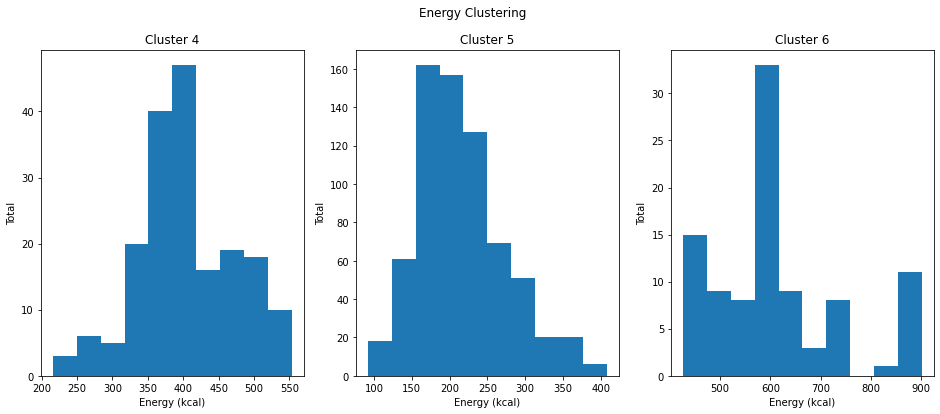

In [42]:
# Creates chart with subplots for histograms
plt.figure(figsize=(16, 6))
plt.suptitle('Energy Clustering')

plt.subplot(131)
plt.hist(cluster_4)
plt.title('Cluster 4')
plt.xlabel('Energy (kcal)')
plt.ylabel('Total')

plt.subplot(132)
plt.hist(cluster_5)
plt.title('Cluster 5')
plt.xlabel('Energy (kcal)')
plt.ylabel('Total')

plt.subplot(133)
plt.hist(cluster_6)
plt.title('Cluster 6')
plt.xlabel('Energy (kcal)')
plt.ylabel('Total')
    
plt.show()

In [43]:
# Assigns variable for each cluster in specified column
cluster_0 = train[train.cluster == 0]['Protein (g)']
cluster_1 = train[train.cluster == 1]['Protein (g)']
cluster_2 = train[train.cluster == 2]['Protein (g)']
cluster_3 = train[train.cluster == 3]['Protein (g)']
cluster_4 = train[train.cluster == 4]['Protein (g)']
cluster_5 = train[train.cluster == 5]['Protein (g)']
cluster_6 = train[train.cluster == 6]['Protein (g)']

In [44]:
# Assigns variable for each cluster not in specified column
non_cluster_0 = train[train.cluster != 0]['Protein (g)']
non_cluster_1 = train[train.cluster != 1]['Protein (g)']
non_cluster_2 = train[train.cluster != 2]['Protein (g)']
non_cluster_3 = train[train.cluster != 3]['Protein (g)']
non_cluster_4 = train[train.cluster != 4]['Protein (g)']
non_cluster_5 = train[train.cluster != 5]['Protein (g)']
non_cluster_6 = train[train.cluster != 6]['Protein (g)']

### Independent 2-sample t-tests

In [45]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_0, non_cluster_0, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(-45.60262404433188, 0.0)

In [46]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_1, non_cluster_1, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We fail to reject the Null Hypothesis


(0.14277130860472467, 0.8865330327465646)

In [47]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_2, non_cluster_2, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(4.453018178110027, 9.371634053499902e-06)

In [48]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_3, non_cluster_3, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(-15.725149172170672, 4.606395240085769e-54)

In [49]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_4, non_cluster_4, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(-11.58046803564057, 4.581483629706495e-25)

In [50]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_5, non_cluster_5, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(51.69885777767681, 5.627692877383408e-265)

In [51]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_6, non_cluster_6, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(3.322102372428378, 0.0012551806500458059)

In [52]:
# Applies Kruskal-Wallis test for cross-verification
stats.kruskal(cluster_0, cluster_1, cluster_2, cluster_3, cluster_4, cluster_5, cluster_6)

KruskalResult(statistic=2357.1849035273135, pvalue=0.0)

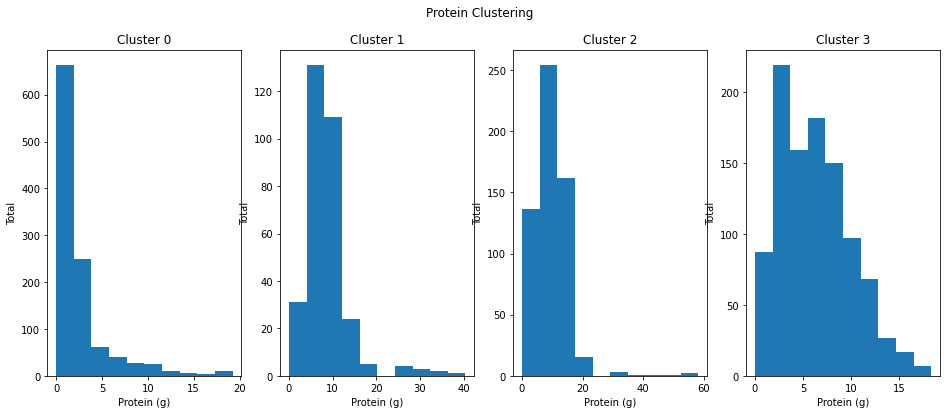

In [53]:
# Creates chart with subplots for histograms
plt.figure(figsize=(16, 6))
plt.suptitle('Protein Clustering')

plt.subplot(141)
plt.hist(cluster_0)
plt.title('Cluster 0')
plt.xlabel('Protein (g)')
plt.ylabel('Total')

plt.subplot(142)
plt.hist(cluster_1)
plt.title('Cluster 1')
plt.xlabel('Protein (g)')
plt.ylabel('Total')

plt.subplot(143)
plt.hist(cluster_2)
plt.title('Cluster 2')
plt.xlabel('Protein (g)')
plt.ylabel('Total')

plt.subplot(144)
plt.hist(cluster_3)
plt.title('Cluster 3')
plt.xlabel('Protein (g)')
plt.ylabel('Total')

plt.show()

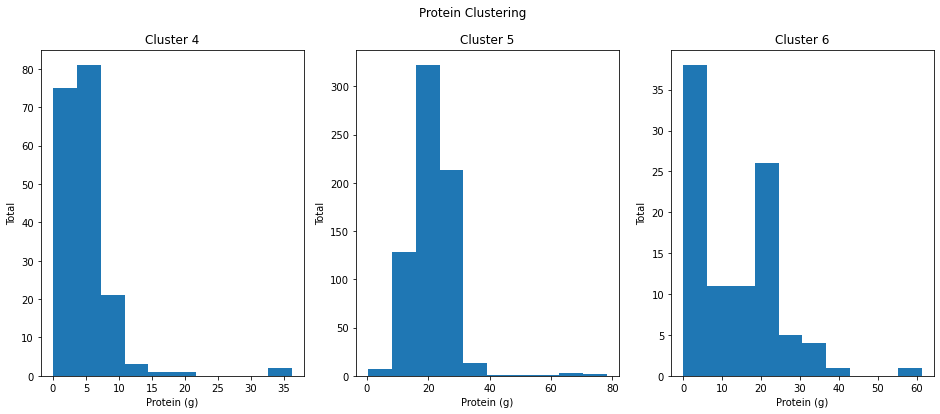

In [54]:
# Creates chart with subplots for histograms
plt.figure(figsize=(16, 6))
plt.suptitle('Protein Clustering')

plt.subplot(131)
plt.hist(cluster_4)
plt.title('Cluster 4')
plt.xlabel('Protein (g)')
plt.ylabel('Total')

plt.subplot(132)
plt.hist(cluster_5)
plt.title('Cluster 5')
plt.xlabel('Protein (g)')
plt.ylabel('Total')

plt.subplot(133)
plt.hist(cluster_6)
plt.title('Cluster 6')
plt.xlabel('Protein (g)')
plt.ylabel('Total')
    
plt.show()

In [55]:
# Assigns variable for each cluster in specified column
cluster_0 = train[train.cluster == 0]['Carbohydrate (g)']
cluster_1 = train[train.cluster == 1]['Carbohydrate (g)']
cluster_2 = train[train.cluster == 2]['Carbohydrate (g)']
cluster_3 = train[train.cluster == 3]['Carbohydrate (g)']
cluster_4 = train[train.cluster == 4]['Carbohydrate (g)']
cluster_5 = train[train.cluster == 5]['Carbohydrate (g)']
cluster_6 = train[train.cluster == 6]['Carbohydrate (g)']

In [56]:
# Assigns variable for each cluster not in specified column
non_cluster_0 = train[train.cluster != 0]['Carbohydrate (g)']
non_cluster_1 = train[train.cluster != 1]['Carbohydrate (g)']
non_cluster_2 = train[train.cluster != 2]['Carbohydrate (g)']
non_cluster_3 = train[train.cluster != 3]['Carbohydrate (g)']
non_cluster_4 = train[train.cluster != 4]['Carbohydrate (g)']
non_cluster_5 = train[train.cluster != 5]['Carbohydrate (g)']
non_cluster_6 = train[train.cluster != 6]['Carbohydrate (g)']

### Independent 2-sample t-tests

In [57]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_0, non_cluster_0, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(-39.84310346742154, 1.513807211887449e-284)

In [58]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_1, non_cluster_1, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(66.67454807621262, 6.26598013564501e-228)

In [59]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_2, non_cluster_2, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(27.318476711162713, 1.5031671869809832e-135)

In [60]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_3, non_cluster_3, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(-13.214342514601205, 5.0689162676775307e-39)

In [61]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_4, non_cluster_4, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(53.53011047508021, 1.6622918798834322e-129)

In [62]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_5, non_cluster_5, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(-43.04081963952539, 0.0)

In [63]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_6, non_cluster_6, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(-6.944904593317694, 2.5752545512185674e-10)

In [64]:
# Applies Kruskal-Wallis test for cross-verification
stats.kruskal(cluster_0, cluster_1, cluster_2, cluster_3, cluster_4, cluster_5, cluster_6)

KruskalResult(statistic=2885.61855832773, pvalue=0.0)

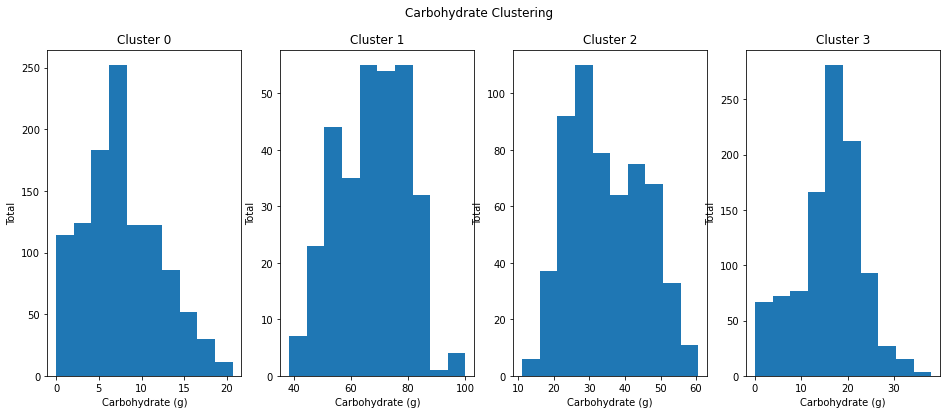

In [65]:
# Creates chart with subplots for histograms
plt.figure(figsize=(16, 6))
plt.suptitle('Carbohydrate Clustering')

plt.subplot(141)
plt.hist(cluster_0)
plt.title('Cluster 0')
plt.xlabel('Carbohydrate (g)')
plt.ylabel('Total')

plt.subplot(142)
plt.hist(cluster_1)
plt.title('Cluster 1')
plt.xlabel('Carbohydrate (g)')
plt.ylabel('Total')

plt.subplot(143)
plt.hist(cluster_2)
plt.title('Cluster 2')
plt.xlabel('Carbohydrate (g)')
plt.ylabel('Total')

plt.subplot(144)
plt.hist(cluster_3)
plt.title('Cluster 3')
plt.xlabel('Carbohydrate (g)')
plt.ylabel('Total')

plt.show()

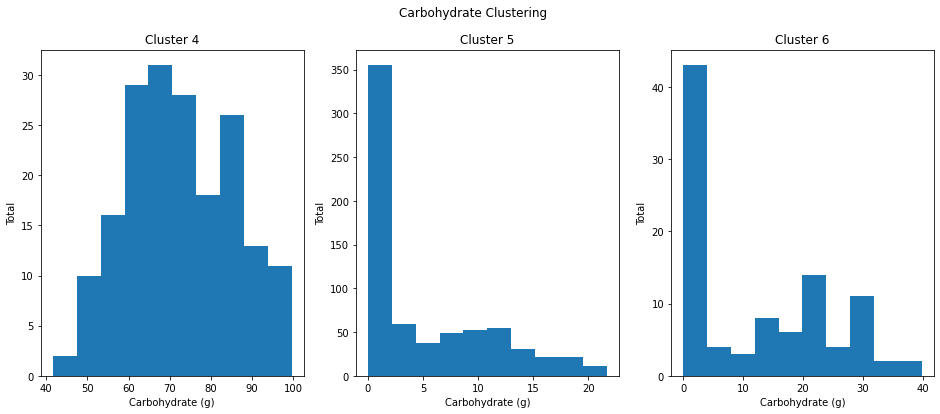

In [66]:
# Creates chart with subplots for histograms
plt.figure(figsize=(16, 6))
plt.suptitle('Carbohydrate Clustering')

plt.subplot(131)
plt.hist(cluster_4)
plt.title('Cluster 4')
plt.xlabel('Carbohydrate (g)')
plt.ylabel('Total')

plt.subplot(132)
plt.hist(cluster_5)
plt.title('Cluster 5')
plt.xlabel('Carbohydrate (g)')
plt.ylabel('Total')

plt.subplot(133)
plt.hist(cluster_6)
plt.title('Cluster 6')
plt.xlabel('Carbohydrate (g)')
plt.ylabel('Total')
    
plt.show()

In [67]:
# Assigns variable for each cluster in specified column
cluster_0 = train[train.cluster == 0]['Sugars, total\n(g)']
cluster_1 = train[train.cluster == 1]['Sugars, total\n(g)']
cluster_2 = train[train.cluster == 2]['Sugars, total\n(g)']
cluster_3 = train[train.cluster == 3]['Sugars, total\n(g)']
cluster_4 = train[train.cluster == 4]['Sugars, total\n(g)']
cluster_5 = train[train.cluster == 5]['Sugars, total\n(g)']
cluster_6 = train[train.cluster == 6]['Sugars, total\n(g)']

In [68]:
# Assigns variable for each cluster not in specified column
non_cluster_0 = train[train.cluster != 0]['Sugars, total\n(g)']
non_cluster_1 = train[train.cluster != 1]['Sugars, total\n(g)']
non_cluster_2 = train[train.cluster != 2]['Sugars, total\n(g)']
non_cluster_3 = train[train.cluster != 3]['Sugars, total\n(g)']
non_cluster_4 = train[train.cluster != 4]['Sugars, total\n(g)']
non_cluster_5 = train[train.cluster != 5]['Sugars, total\n(g)']
non_cluster_6 = train[train.cluster != 6]['Sugars, total\n(g)']

### Independent 2-sample t-tests

In [69]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_0, non_cluster_0, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(-12.859270039357943, 4.58519563226417e-37)

In [70]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_1, non_cluster_1, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(12.951729633913967, 7.942370890230152e-32)

In [71]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_2, non_cluster_2, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(3.670025069954226, 0.0002536717673134581)

In [72]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_3, non_cluster_3, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(-17.933753937321438, 3.2887846603030367e-69)

In [73]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_4, non_cluster_4, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(41.50973523870414, 3.327039044997427e-96)

In [74]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_5, non_cluster_5, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(-31.561805063835862, 2.144977269140314e-193)

In [75]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_6, non_cluster_6, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(-7.01501361631197, 1.1442198382813834e-10)

In [76]:
# Applies Kruskal-Wallis test for cross-verification
stats.kruskal(cluster_0, cluster_1, cluster_2, cluster_3, cluster_4, cluster_5, cluster_6)

KruskalResult(statistic=1580.95944679601, pvalue=0.0)

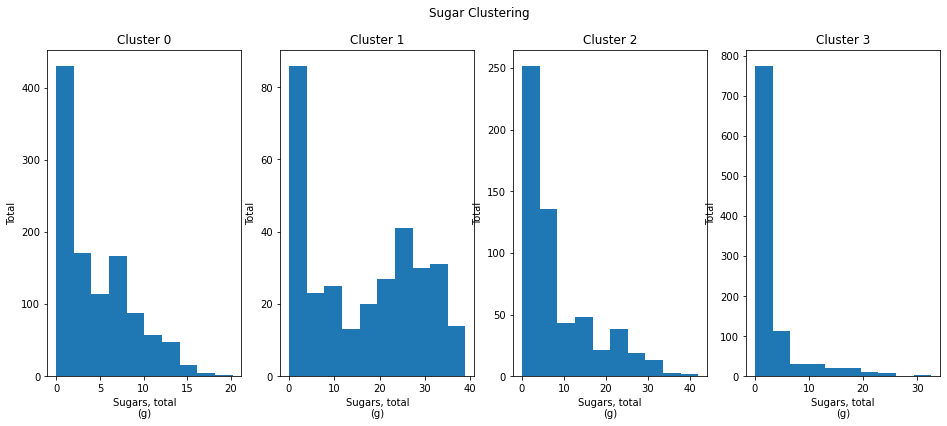

In [77]:
# Creates chart with subplots for histograms
plt.figure(figsize=(16, 6))
plt.suptitle('Sugar Clustering')

plt.subplot(141)
plt.hist(cluster_0)
plt.title('Cluster 0')
plt.xlabel('Sugars, total\n(g)')
plt.ylabel('Total')

plt.subplot(142)
plt.hist(cluster_1)
plt.title('Cluster 1')
plt.xlabel('Sugars, total\n(g)')
plt.ylabel('Total')

plt.subplot(143)
plt.hist(cluster_2)
plt.title('Cluster 2')
plt.xlabel('Sugars, total\n(g)')
plt.ylabel('Total')

plt.subplot(144)
plt.hist(cluster_3)
plt.title('Cluster 3')
plt.xlabel('Sugars, total\n(g)')
plt.ylabel('Total')

plt.show()

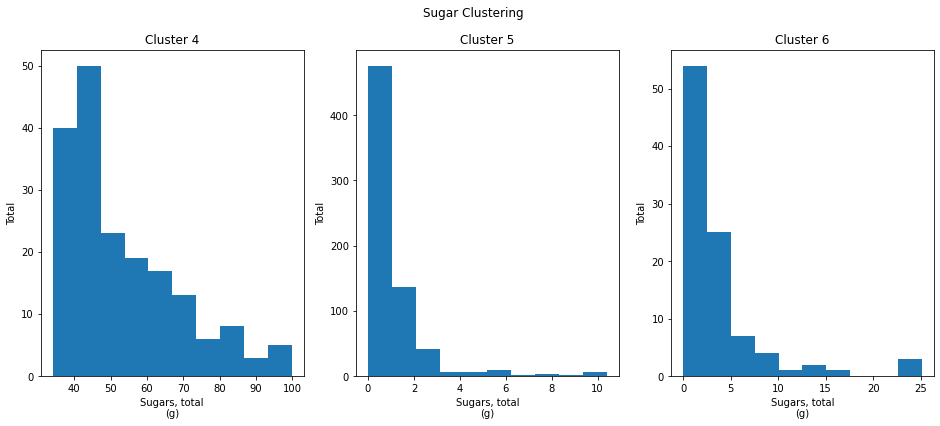

In [78]:
# Creates chart with subplots for histograms
plt.figure(figsize=(16, 6))
plt.suptitle('Sugar Clustering')

plt.subplot(131)
plt.hist(cluster_4)
plt.title('Cluster 4')
plt.xlabel('Sugars, total\n(g)')
plt.ylabel('Total')

plt.subplot(132)
plt.hist(cluster_5)
plt.title('Cluster 5')
plt.xlabel('Sugars, total\n(g)')
plt.ylabel('Total')

plt.subplot(133)
plt.hist(cluster_6)
plt.title('Cluster 6')
plt.xlabel('Sugars, total\n(g)')
plt.ylabel('Total')
    
plt.show()

In [79]:
cluster_0 = train[train.cluster == 0]['Fiber, total dietary (g)']
cluster_1 = train[train.cluster == 1]['Fiber, total dietary (g)']
cluster_2 = train[train.cluster == 2]['Fiber, total dietary (g)']
cluster_3 = train[train.cluster == 3]['Fiber, total dietary (g)']
cluster_4 = train[train.cluster == 4]['Fiber, total dietary (g)']
cluster_5 = train[train.cluster == 5]['Fiber, total dietary (g)']
cluster_6 = train[train.cluster == 6]['Fiber, total dietary (g)']

In [80]:
non_cluster_0 = train[train.cluster != 0]['Fiber, total dietary (g)']
non_cluster_1 = train[train.cluster != 1]['Fiber, total dietary (g)']
non_cluster_2 = train[train.cluster != 2]['Fiber, total dietary (g)']
non_cluster_3 = train[train.cluster != 3]['Fiber, total dietary (g)']
non_cluster_4 = train[train.cluster != 4]['Fiber, total dietary (g)']
non_cluster_5 = train[train.cluster != 5]['Fiber, total dietary (g)']
non_cluster_6 = train[train.cluster != 6]['Fiber, total dietary (g)']

### Independent 2-sample t-tests

In [81]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_0, non_cluster_0, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(-16.16153357206344, 6.002939347116878e-57)

In [82]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_1, non_cluster_1, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(13.411631675448795, 1.0050262158596881e-32)

In [83]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_2, non_cluster_2, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(8.557135100188344, 3.400480991916839e-17)

In [84]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_3, non_cluster_3, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(-2.8368249922041993, 0.004583613428306615)

In [85]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_4, non_cluster_4, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(3.4853516237281026, 0.0005989426352325314)

In [86]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_5, non_cluster_5, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(-31.443742105750452, 6.125053983903609e-194)

In [87]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_6, non_cluster_6, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(4.596787882140087, 1.288544957045295e-05)

In [88]:
# Applies Kruskal-Wallis test for cross-verification
stats.kruskal(cluster_0, cluster_1, cluster_2, cluster_3, cluster_4, cluster_5, cluster_6)

KruskalResult(statistic=1405.1756073874406, pvalue=1.8348530583714824e-300)

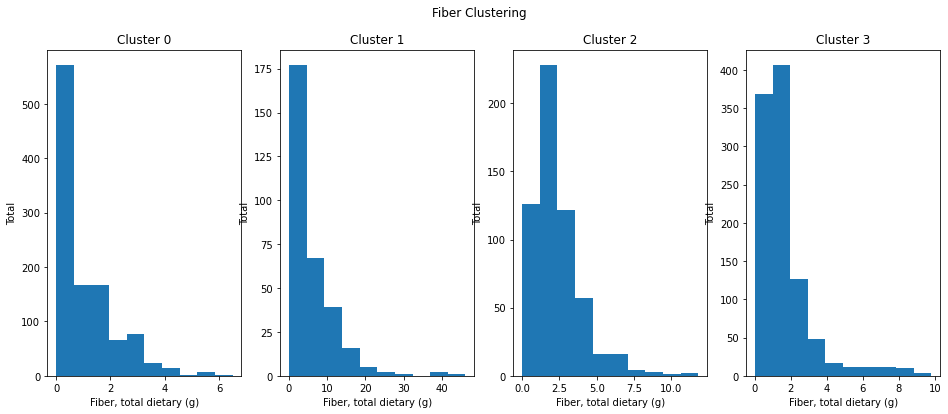

In [89]:
# Creates chart with subplots for histograms
plt.figure(figsize=(16, 6))
plt.suptitle('Fiber Clustering')

plt.subplot(141)
plt.hist(cluster_0)
plt.title('Cluster 0')
plt.xlabel('Fiber, total dietary (g)')
plt.ylabel('Total')

plt.subplot(142)
plt.hist(cluster_1)
plt.title('Cluster 1')
plt.xlabel('Fiber, total dietary (g)')
plt.ylabel('Total')

plt.subplot(143)
plt.hist(cluster_2)
plt.title('Cluster 2')
plt.xlabel('Fiber, total dietary (g)')
plt.ylabel('Total')

plt.subplot(144)
plt.hist(cluster_3)
plt.title('Cluster 3')
plt.xlabel('Fiber, total dietary (g)')
plt.ylabel('Total')

plt.show()

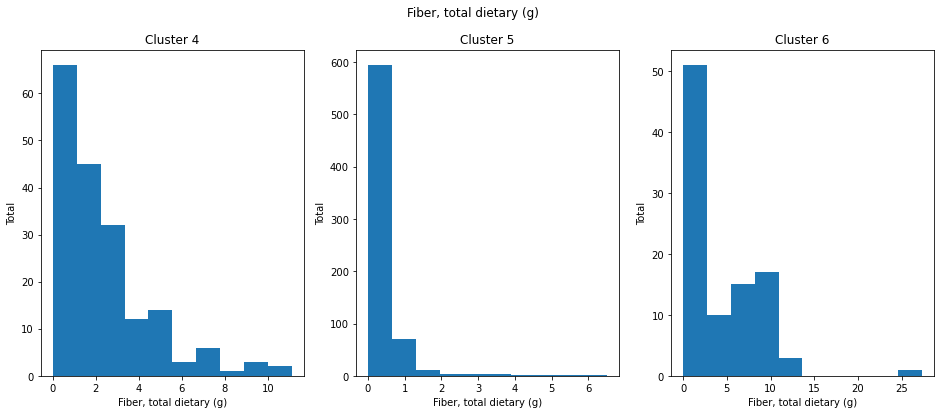

In [90]:
# Creates chart with subplots for histograms
plt.figure(figsize=(16, 6))
plt.suptitle('Fiber, total dietary (g)')

plt.subplot(131)
plt.hist(cluster_4)
plt.title('Cluster 4')
plt.xlabel('Fiber, total dietary (g)')
plt.ylabel('Total')

plt.subplot(132)
plt.hist(cluster_5)
plt.title('Cluster 5')
plt.xlabel('Fiber, total dietary (g)')
plt.ylabel('Total')

plt.subplot(133)
plt.hist(cluster_6)
plt.title('Cluster 6')
plt.xlabel('Fiber, total dietary (g)')
plt.ylabel('Total')
    
plt.show()

In [91]:
# Assigns variable for each cluster in specified column
cluster_0 = train[train.cluster == 0]['Total Fat (g)']
cluster_1 = train[train.cluster == 1]['Total Fat (g)']
cluster_2 = train[train.cluster == 2]['Total Fat (g)']
cluster_3 = train[train.cluster == 3]['Total Fat (g)']
cluster_4 = train[train.cluster == 4]['Total Fat (g)']
cluster_5 = train[train.cluster == 5]['Total Fat (g)']
cluster_6 = train[train.cluster == 6]['Total Fat (g)']

In [92]:
# Assigns variable for each cluster not in specified column
non_cluster_0 = train[train.cluster != 0]['Total Fat (g)']
non_cluster_1 = train[train.cluster != 1]['Total Fat (g)']
non_cluster_2 = train[train.cluster != 2]['Total Fat (g)']
non_cluster_3 = train[train.cluster != 3]['Total Fat (g)']
non_cluster_4 = train[train.cluster != 4]['Total Fat (g)']
non_cluster_5 = train[train.cluster != 5]['Total Fat (g)']
non_cluster_6 = train[train.cluster != 6]['Total Fat (g)']

### Independent 2-sample t-tests

In [93]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_0, non_cluster_0, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(-43.776544479704945, 0.0)

In [94]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_1, non_cluster_1, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(9.143960584642954, 3.923301940461622e-18)

In [95]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_2, non_cluster_2, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(10.676954467428162, 1.3645434987300794e-25)

In [96]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_3, non_cluster_3, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(-13.120762042554265, 1.5739737253770715e-38)

In [97]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_4, non_cluster_4, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(3.821513112043526, 0.00017537627141856903)

In [98]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_5, non_cluster_5, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(10.252527994081369, 5.905939116752828e-24)

In [99]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_6, non_cluster_6, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(26.057135878249984, 1.6440907636043154e-45)

In [100]:
# Applies Kruskal-Wallis test for cross-verification
stats.kruskal(cluster_0, cluster_1, cluster_2, cluster_3, cluster_4, cluster_5, cluster_6)

KruskalResult(statistic=2028.9310350226492, pvalue=0.0)

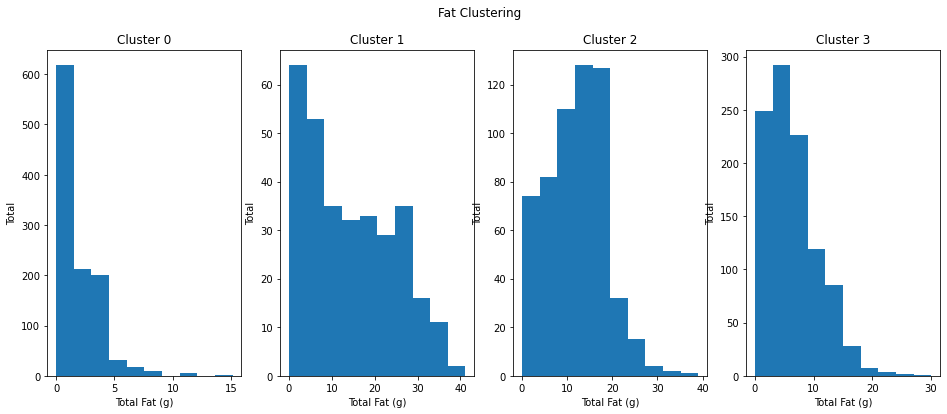

In [101]:
# Creates chart with subplots for histograms
plt.figure(figsize=(16, 6))
plt.suptitle('Fat Clustering')

plt.subplot(141)
plt.hist(cluster_0)
plt.title('Cluster 0')
plt.xlabel('Total Fat (g)')
plt.ylabel('Total')

plt.subplot(142)
plt.hist(cluster_1)
plt.title('Cluster 1')
plt.xlabel('Total Fat (g)')
plt.ylabel('Total')

plt.subplot(143)
plt.hist(cluster_2)
plt.title('Cluster 2')
plt.xlabel('Total Fat (g)')
plt.ylabel('Total')

plt.subplot(144)
plt.hist(cluster_3)
plt.title('Cluster 3')
plt.xlabel('Total Fat (g)')
plt.ylabel('Total')

plt.show()

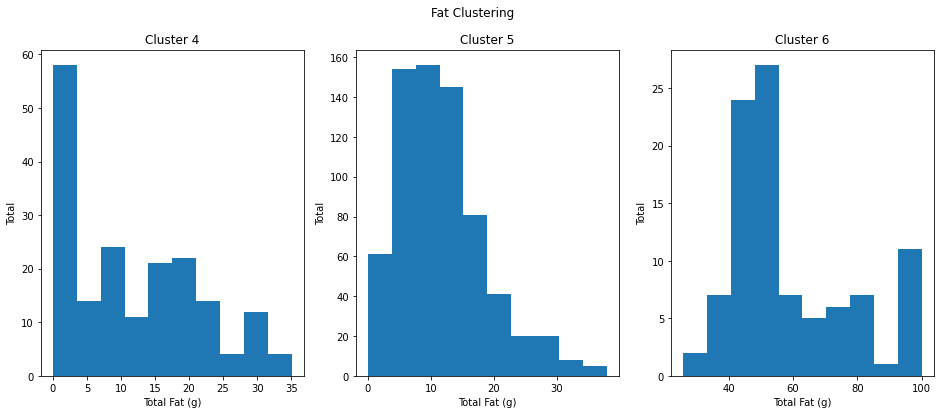

In [102]:
# Creates chart with subplots for histograms
plt.figure(figsize=(16, 6))
plt.suptitle('Fat Clustering')

plt.subplot(131)
plt.hist(cluster_4)
plt.title('Cluster 4')
plt.xlabel('Total Fat (g)')
plt.ylabel('Total')

plt.subplot(132)
plt.hist(cluster_5)
plt.title('Cluster 5')
plt.xlabel('Total Fat (g)')
plt.ylabel('Total')

plt.subplot(133)
plt.hist(cluster_6)
plt.title('Cluster 6')
plt.xlabel('Total Fat (g)')
plt.ylabel('Total')
    
plt.show()

In [103]:
# Assigns variable for each cluster in specified column
cluster_0 = train[train.cluster == 0]['Water\n(g)']
cluster_1 = train[train.cluster == 1]['Water\n(g)']
cluster_2 = train[train.cluster == 2]['Water\n(g)']
cluster_3 = train[train.cluster == 3]['Water\n(g)']
cluster_4 = train[train.cluster == 4]['Water\n(g)']
cluster_5 = train[train.cluster == 5]['Water\n(g)']
cluster_6 = train[train.cluster == 6]['Water\n(g)']

In [104]:
# Assigns variable for each cluster not in specified column
non_cluster_0 = train[train.cluster != 0]['Water\n(g)']
non_cluster_1 = train[train.cluster != 1]['Water\n(g)']
non_cluster_2 = train[train.cluster != 2]['Water\n(g)']
non_cluster_3 = train[train.cluster != 3]['Water\n(g)']
non_cluster_4 = train[train.cluster != 4]['Water\n(g)']
non_cluster_5 = train[train.cluster != 5]['Water\n(g)']
non_cluster_6 = train[train.cluster != 6]['Water\n(g)']

### Independent 2-sample t-tests

In [105]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_0, non_cluster_0, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(79.49893697587015, 0.0)

In [106]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_1, non_cluster_1, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(-107.11498281386183, 0.0)

In [107]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_2, non_cluster_2, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(-36.20574309110175, 7.828536710326802e-237)

In [108]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_3, non_cluster_3, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(22.89456253938972, 2.7115357498668837e-108)

In [109]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_4, non_cluster_4, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(-66.58319206832195, 1.2505941278989511e-196)

In [110]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_5, non_cluster_5, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We fail to reject the Null Hypothesis


(0.4863318448827287, 0.6267623542440581)

In [111]:
# Gets t statistic and p value for independent t-test and returns null hypothesis verdict
t, p = stats.ttest_ind(cluster_6, non_cluster_6, equal_var=False)
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")
t, p

We reject the Null Hypothesis


(-29.1040885700335, 1.5011752097793132e-53)

In [112]:
# Applies Kruskal-Wallis test for cross-verification
stats.kruskal(cluster_0, cluster_1, cluster_2, cluster_3, cluster_4, cluster_5, cluster_6)

KruskalResult(statistic=3602.709974051989, pvalue=0.0)

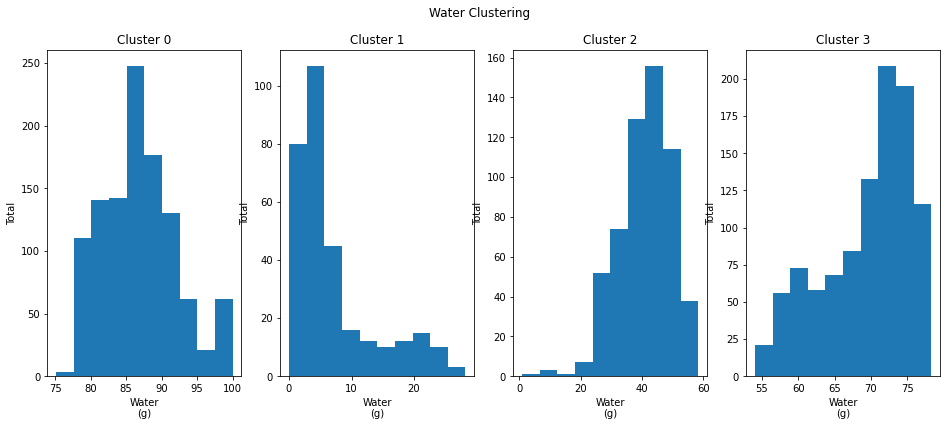

In [113]:
# Creates chart with subplots for histograms
plt.figure(figsize=(16, 6))
plt.suptitle('Water Clustering')

plt.subplot(141)
plt.hist(cluster_0)
plt.title('Cluster 0')
plt.xlabel('Water\n(g)')
plt.ylabel('Total')

plt.subplot(142)
plt.hist(cluster_1)
plt.title('Cluster 1')
plt.xlabel('Water\n(g)')
plt.ylabel('Total')

plt.subplot(143)
plt.hist(cluster_2)
plt.title('Cluster 2')
plt.xlabel('Water\n(g)')
plt.ylabel('Total')

plt.subplot(144)
plt.hist(cluster_3)
plt.title('Cluster 3')
plt.xlabel('Water\n(g)')
plt.ylabel('Total')

plt.show()

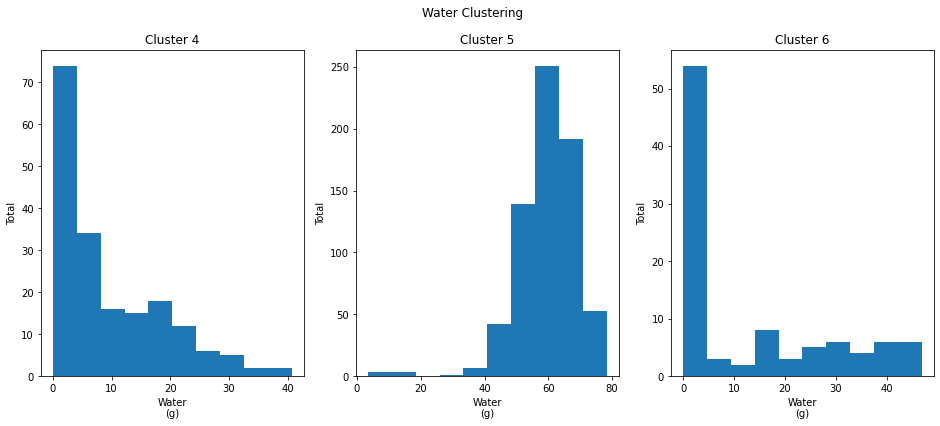

In [114]:
# Creates chart with subplots for histograms
plt.figure(figsize=(16, 6))
plt.suptitle('Water Clustering')

plt.subplot(131)
plt.hist(cluster_4)
plt.title('Cluster 4')
plt.xlabel('Water\n(g)')
plt.ylabel('Total')

plt.subplot(132)
plt.hist(cluster_5)
plt.title('Cluster 5')
plt.xlabel('Water\n(g)')
plt.ylabel('Total')

plt.subplot(133)
plt.hist(cluster_6)
plt.title('Cluster 6')
plt.xlabel('Water\n(g)')
plt.ylabel('Total')
    
plt.show()

# Project Summary
Conclusion
- There are pretty discernable groupings for the different clusters plotted out
- This dataset does not provide less granular discriptions for broader groupings
- Looking at food descriptions manually you can see some similarities in the types of food groupings however they do not always fall where one would normally think
- There's a huge variety of food descriptions ranging from ingredients to whole meals

Next Steps
- There is a much, much larger and up-to-date dataset that includes branded items and breaks things down by their ingredients
- I would like to try to see if I can categorize all the base ingredients for these products and see if they form clusters with strong relationships
- Include micronutrients
- I would also like to incorporate their JSON files using their API to continually provide the most up-to-date information whenever the project runs


Learnings
- The source of this data comes from real world random sampling from actual grocery stores which may result in some regional and seasonal variability especially compared to the world abroad
- The methods for measuring different items vary according to the type of food and nutrient values made up of multiple ingredients may not accurately reflect what's actually in the final product

Recommendations
- Find better techniques for measuring what nutrients actually are digested by accounting for the average of any nutrients that aren't absorbed by the human body
- See if eating foods that "Normally go together" or drinking certain beverages either increases or decreases nutrient uptake for the human body

In [115]:
help(model.find_k)

Help on function find_k in module model:

find_k(scaled_train, cluster_vars, k_range)
    Evaluates k running through different values of k on scaled_train (the first dataframe in our list, X) and comparing the Sum of Squared Errors, the change in SSE from one k to the next, and the percent change from one k to the next.

